![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

### Данные и библиотеки

In [ ]:
import torch
import random
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torchvision.datasets

In [ ]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 55933958.35it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2217668.27it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14741730.87it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8179703.21it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
len(y_train), len(y_test)

(60000, 10000)

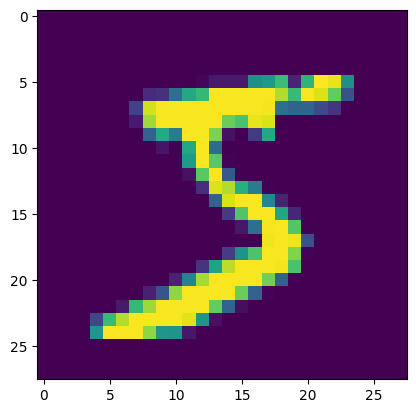

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
X_train.shape

torch.Size([60000, 1, 28, 28])

### Обучение и разновидности архитектур

Исходная архитектура LeNet5

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()

        self.fc3   = torch.nn.Linear(84, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5 = LeNet5()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9736)
tensor(0.9828)
tensor(0.9859)
tensor(0.9875)
tensor(0.9889)
tensor(0.9879)
tensor(0.9878)
tensor(0.9896)
tensor(0.9883)
tensor(0.9864)
tensor(0.9865)
tensor(0.9879)
tensor(0.9894)
tensor(0.9873)
tensor(0.9894)
tensor(0.9897)
tensor(0.9888)
tensor(0.9891)
tensor(0.9885)
tensor(0.9894)
tensor(0.9869)
tensor(0.9898)
tensor(0.9905)
tensor(0.9888)
tensor(0.9876)
tensor(0.9897)
tensor(0.9885)
tensor(0.9889)
tensor(0.9898)
tensor(0.9883)
tensor(0.9902)
tensor(0.9902)
tensor(0.9881)
tensor(0.9877)
tensor(0.9879)
tensor(0.9895)
tensor(0.9895)
tensor(0.9878)
tensor(0.9895)
tensor(0.9892)
tensor(0.9895)
tensor(0.9897)
tensor(0.9911)
tensor(0.9898)
tensor(0.9897)
tensor(0.9898)
tensor(0.9900)
tensor(0.9895)
tensor(0.9902)
tensor(0.9894)
tensor(0.9896)
tensor(0.9896)
tensor(0.9899)
tensor(0.9903)
tensor(0.9881)
tensor(0.9895)
tensor(0.9906)
tensor(0.9894)
tensor(0.9895)
tensor(0.9895)
tensor(0.9899)
tensor(0.9894)
tensor(0.9905)
tensor(0.9908)
tensor(0.9910)
tensor(0.9882)
tensor(0.9

KeyboardInterrupt: 

In [ ]:
lenet5.forward(X_test)

tensor([[ -1.8882,   3.1104,   1.5412,  ...,  21.5497,  -3.2684,   5.9284],
        [  1.9855,   4.4376,  26.3468,  ...,  -5.8775,   5.3912, -11.6174],
        [-12.3260,  26.7580,  -2.7170,  ...,   4.9156,   1.6304,  -2.6330],
        ...,
        [ -9.3328,  -1.6175,  -7.1294,  ...,  -0.1220,   2.0991,   5.5999],
        [ -4.5187,  -2.5302, -15.9790,  ..., -11.4448,   3.9315,  -5.1506],
        [  2.2222,  -5.8773,   9.1154,  ...,  -6.9185,  -1.3136,  -5.6106]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
acc_values = [tensor.item() for tensor in test_accuracy_history]
loss_values = [tensor.item() for tensor in test_loss_history]

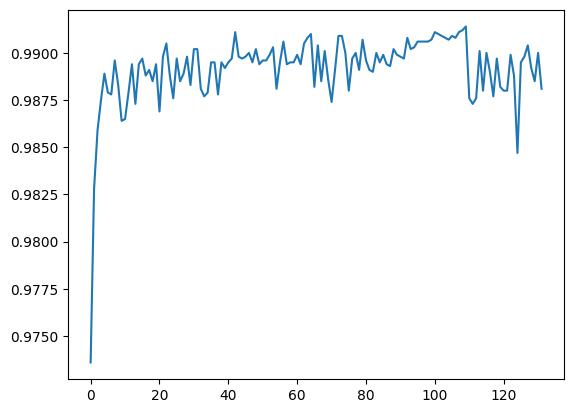

In [ ]:
plt.plot(acc_values);

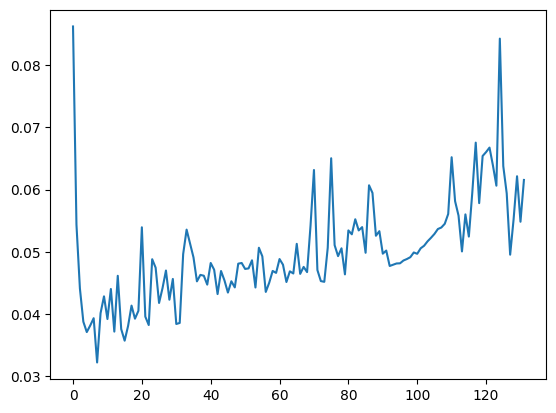

In [ ]:
plt.plot(loss_values);

In [ ]:
test_accuracy_df = pd.DataFrame(acc_values)
test_loss_df = pd.DataFrame(loss_values)

In [ ]:
test_accuracy_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_accuracy.csv', index=False)
test_loss_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_loss.csv', index=False)

Изменим функцию активации Mish и заменим на MaxPooling

In [ ]:
class LeNet5_mish(torch.nn.Module):
    def __init__(self):
        super(LeNet5_mish, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Mish()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Mish()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Mish()
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Mish()
        self.fc3   = torch.nn.Linear(84, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5_mish = LeNet5_mish()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5_mish.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5_mish.parameters(), lr=1.0e-3)

In [ ]:
model_device = next(lenet5_mish.parameters()).device
print(f"Модель lenet5_mish находится на устройстве: {model_device}")

# Для проверки устройств тензоров
def print_tensor_device(tensor, tensor_name):
    print(f"Тензор {tensor_name} находится на устройстве: {tensor.device}")

# Проверка устройств для данных
print_tensor_device(X_test, "X_test")
print_tensor_device(y_test, "y_test")

# Если X_batch и y_batch еще не созданы, используйте пример данных
batch_size = 100
order = np.random.permutation(len(X_train))
batch_indexes = order[:batch_size]

X_batch = X_train[batch_indexes].to(device)
y_batch = y_train[batch_indexes].to(device)

print_tensor_device(X_batch, "X_batch")
print_tensor_device(y_batch, "y_batch")


Модель lenet5_mish находится на устройстве: cuda:0
Тензор X_test находится на устройстве: cuda:0
Тензор y_test находится на устройстве: cuda:0
Тензор X_batch находится на устройстве: cuda:0
Тензор y_batch находится на устройстве: cuda:0


In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5_mish.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5_mish.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9820)
tensor(0.9823)
tensor(0.9857)
tensor(0.9859)
tensor(0.9861)
tensor(0.9859)
tensor(0.9862)
tensor(0.9868)
tensor(0.9859)
tensor(0.9869)
tensor(0.9858)
tensor(0.9876)
tensor(0.9867)
tensor(0.9874)
tensor(0.9841)
tensor(0.9880)
tensor(0.9883)
tensor(0.9905)
tensor(0.9873)
tensor(0.9889)
tensor(0.9883)
tensor(0.9882)
tensor(0.9891)
tensor(0.9898)
tensor(0.9897)
tensor(0.9873)
tensor(0.9892)
tensor(0.9874)
tensor(0.9883)
tensor(0.9870)
tensor(0.9860)
tensor(0.9884)
tensor(0.9903)
tensor(0.9891)
tensor(0.9888)
tensor(0.9892)
tensor(0.9909)
tensor(0.9884)
tensor(0.9898)
tensor(0.9877)
tensor(0.9884)
tensor(0.9899)
tensor(0.9894)
tensor(0.9889)
tensor(0.9902)
tensor(0.9874)
tensor(0.9856)
tensor(0.9872)
tensor(0.9897)
tensor(0.9907)
tensor(0.9895)
tensor(0.9883)
tensor(0.9895)
tensor(0.9889)
tensor(0.9888)
tensor(0.9907)
tensor(0.9885)
tensor(0.9879)
tensor(0.9900)
tensor(0.9861)
tensor(0.9877)
tensor(0.9891)
tensor(0.9898)
tensor(0.9901)
tensor(0.9905)
tensor(0.9881)
tensor(0.9

In [ ]:
lenet5_mish.forward(X_test)
acc_values = [tensor.item() for tensor in test_accuracy_history]
loss_values = [tensor.item() for tensor in test_loss_history]

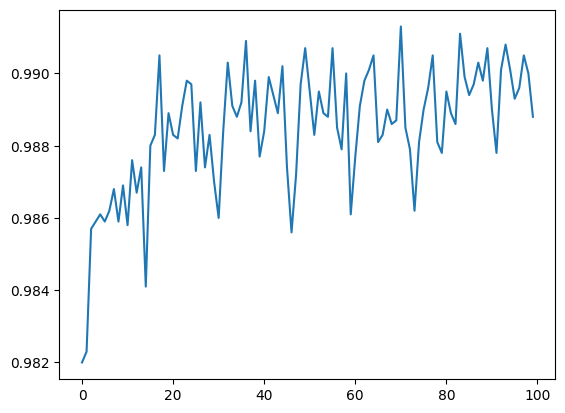

In [ ]:
plt.plot(acc_values);

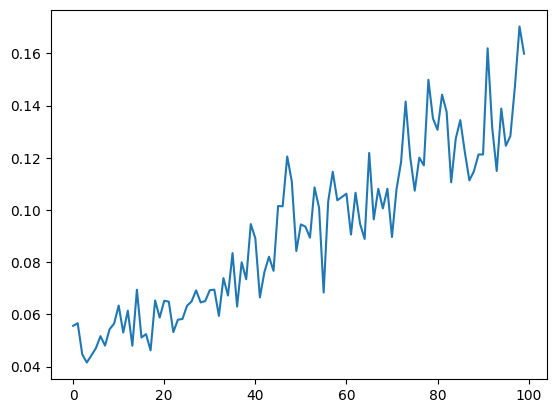

In [ ]:
plt.plot(loss_values);

In [ ]:
test_acc_mish_df = pd.DataFrame(acc_values)
test_loss_mish_df = pd.DataFrame(loss_values)
test_acc_mish_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_mish_accuracy.csv', index=False)
test_loss_mish_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_mish_loss.csv', index=False)

В Mish и заменим на MaxPooling увеличим кол-во эпох

In [ ]:
class LeNet5_mish(torch.nn.Module):
    def __init__(self):
        super(LeNet5_mish, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Mish()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Mish()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Mish()
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Mish()
        self.fc3   = torch.nn.Linear(84, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5_mish = LeNet5_mish()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5_mish.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5_mish.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(300):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5_mish.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5_mish.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9783)
tensor(0.9768)
tensor(0.9810)
tensor(0.9775)
tensor(0.9849)
tensor(0.9878)
tensor(0.9866)
tensor(0.9844)
tensor(0.9831)
tensor(0.9851)
tensor(0.9878)
tensor(0.9823)
tensor(0.9866)
tensor(0.9883)
tensor(0.9867)
tensor(0.9876)
tensor(0.9880)
tensor(0.9869)
tensor(0.9881)
tensor(0.9882)
tensor(0.9884)
tensor(0.9882)
tensor(0.9892)
tensor(0.9863)
tensor(0.9875)
tensor(0.9881)
tensor(0.9859)
tensor(0.9885)
tensor(0.9877)
tensor(0.9864)
tensor(0.9888)
tensor(0.9886)
tensor(0.9883)
tensor(0.9856)
tensor(0.9878)
tensor(0.9882)
tensor(0.9874)
tensor(0.9865)
tensor(0.9884)
tensor(0.9884)
tensor(0.9897)
tensor(0.9884)
tensor(0.9892)
tensor(0.9876)
tensor(0.9885)
tensor(0.9879)
tensor(0.9866)
tensor(0.9899)
tensor(0.9891)
tensor(0.9896)
tensor(0.9900)
tensor(0.9864)
tensor(0.9891)
tensor(0.9910)
tensor(0.9881)
tensor(0.9885)
tensor(0.9866)
tensor(0.9884)
tensor(0.9881)
tensor(0.9893)
tensor(0.9877)
tensor(0.9877)
tensor(0.9850)
tensor(0.9894)
tensor(0.9903)
tensor(0.9882)
tensor(0.9

In [ ]:
lenet5_mish.forward(X_test)
acc_values = [tensor.item() for tensor in test_accuracy_history]
loss_values = [tensor.item() for tensor in test_loss_history]

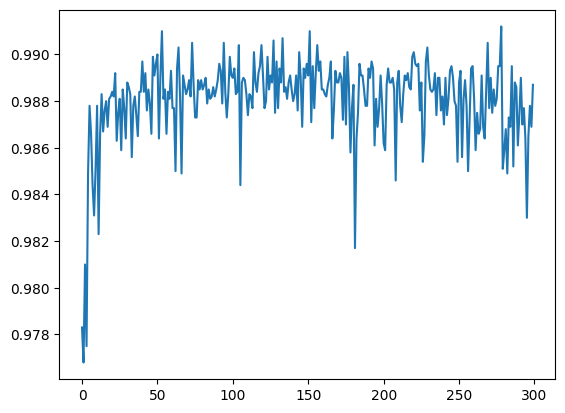

In [ ]:
plt.plot(acc_values);

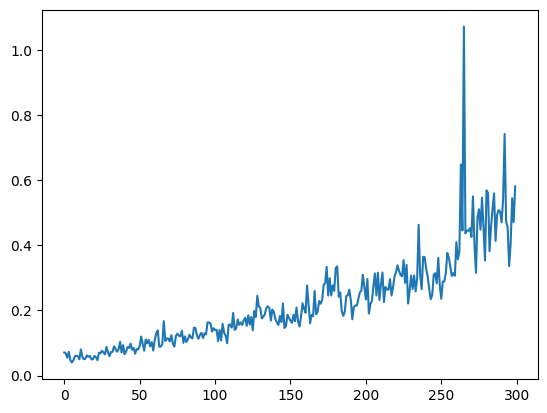

In [ ]:
plt.plot(loss_values);

In [ ]:
test_acc_mish_df = pd.DataFrame(acc_values)
test_loss_mish_df = pd.DataFrame(loss_values)
test_acc_mish_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_300ep_mish_accuracy.csv', index=False)
test_loss_mish_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_300ep_mish_loss.csv', index=False)

Доп свёрточные слои, доп полносвязные слои, меньший padding

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=3, padding=2)
        self.act1_0 = torch.nn.Mish(0.005)
        self.conv1_2 = torch.nn.Conv2d(
            in_channels=6, out_channels=8, kernel_size=3, padding=0)

        self.act1 = torch.nn.Mish(0.005)
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=8, out_channels=16, kernel_size=3, padding=0)
        self.act2_0 = torch.nn.Mish(0.005)
        self.conv2_2 = torch.nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=3, padding=0)

        self.act2 = torch.nn.Mish(0.005)
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 32, 120)
        self.act3 = torch.nn.Mish(0.005)

        self.fc2   = torch.nn.Linear(120, 20)
        self.act4 = torch.nn.Mish(0.005)

        self.fc3   = torch.nn.Linear(20, 40)
        self.act5 = torch.nn.Mish(0.005)

        self.fc4 = torch.nn.Linear(40, 10)

    def forward(self,x):
        x = self.conv1(x)
        x = self.act1_0(x)
        x = self.conv1_2(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2_0(x)
        x = self.conv2_2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        x = self.act5(x)
        x = self.fc4(x)

        return x

lenet5 = LeNet5()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9837)
tensor(0.9858)
tensor(0.9884)
tensor(0.9906)
tensor(0.9898)
tensor(0.9888)
tensor(0.9865)
tensor(0.9912)
tensor(0.9900)
tensor(0.9911)
tensor(0.9883)
tensor(0.9894)
tensor(0.9906)
tensor(0.9828)
tensor(0.9907)
tensor(0.9905)
tensor(0.9903)
tensor(0.9904)
tensor(0.9907)
tensor(0.9896)
tensor(0.9882)
tensor(0.9909)
tensor(0.9899)
tensor(0.9889)
tensor(0.9898)
tensor(0.9903)
tensor(0.9865)
tensor(0.9902)
tensor(0.9916)
tensor(0.9888)
tensor(0.9896)
tensor(0.9903)
tensor(0.9911)
tensor(0.9888)
tensor(0.9896)
tensor(0.9904)
tensor(0.9912)
tensor(0.9909)
tensor(0.9885)
tensor(0.9912)
tensor(0.9907)
tensor(0.9889)
tensor(0.9904)
tensor(0.9903)
tensor(0.9918)
tensor(0.9912)
tensor(0.9899)
tensor(0.9911)
tensor(0.9919)
tensor(0.9923)
tensor(0.9893)
tensor(0.9894)
tensor(0.9914)
tensor(0.9914)
tensor(0.9903)
tensor(0.9911)
tensor(0.9906)
tensor(0.9911)
tensor(0.9907)
tensor(0.9906)
tensor(0.9920)
tensor(0.9930)
tensor(0.9898)
tensor(0.9895)
tensor(0.9902)
tensor(0.9915)
tensor(0.9

In [ ]:
lenet5.forward(X_test)
acc_values = [tensor.item() for tensor in test_accuracy_history]
loss_values = [tensor.item() for tensor in test_loss_history]

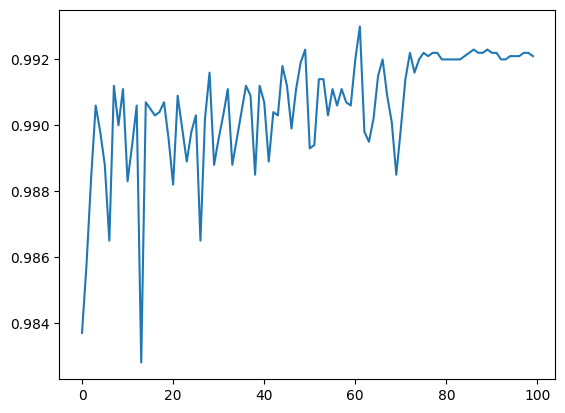

In [ ]:
plt.plot(acc_values);

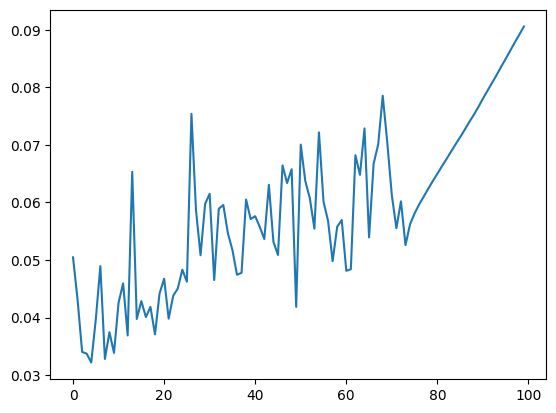

In [ ]:
plt.plot(loss_values);

In [ ]:
test_accuracy_df = pd.DataFrame(acc_values)
test_loss_df = pd.DataFrame(loss_values)

In [ ]:
test_accuracy_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_mish_upgr.csv', index=False)
test_loss_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_loss_mish_upgr.csv', index=False)

Сделаем ReLU вместо Tahn

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()

        self.fc3   = torch.nn.Linear(84, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5 = LeNet5()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9849)
tensor(0.9883)
tensor(0.9892)
tensor(0.9884)
tensor(0.9904)
tensor(0.9893)
tensor(0.9916)
tensor(0.9870)
tensor(0.9885)
tensor(0.9891)
tensor(0.9908)
tensor(0.9920)
tensor(0.9881)
tensor(0.9909)
tensor(0.9894)
tensor(0.9895)
tensor(0.9900)
tensor(0.9883)
tensor(0.9896)
tensor(0.9909)
tensor(0.9904)
tensor(0.9896)
tensor(0.9912)
tensor(0.9900)
tensor(0.9921)
tensor(0.9922)
tensor(0.9876)
tensor(0.9916)
tensor(0.9851)
tensor(0.9928)
tensor(0.9913)
tensor(0.9913)
tensor(0.9923)
tensor(0.9912)
tensor(0.9896)
tensor(0.9911)
tensor(0.9913)
tensor(0.9901)
tensor(0.9926)
tensor(0.9893)
tensor(0.9897)
tensor(0.9921)
tensor(0.9908)
tensor(0.9898)
tensor(0.9914)
tensor(0.9904)
tensor(0.9914)
tensor(0.9915)
tensor(0.9909)
tensor(0.9924)
tensor(0.9912)
tensor(0.9907)
tensor(0.9918)
tensor(0.9916)
tensor(0.9920)
tensor(0.9909)
tensor(0.9917)
tensor(0.9891)
tensor(0.9903)
tensor(0.9916)
tensor(0.9903)
tensor(0.9914)
tensor(0.9878)
tensor(0.9890)
tensor(0.9899)
tensor(0.9908)
tensor(0.9

In [ ]:
lenet5.forward(X_test)
acc_values = [tensor.item() for tensor in test_accuracy_history]
loss_values = [tensor.item() for tensor in test_loss_history]

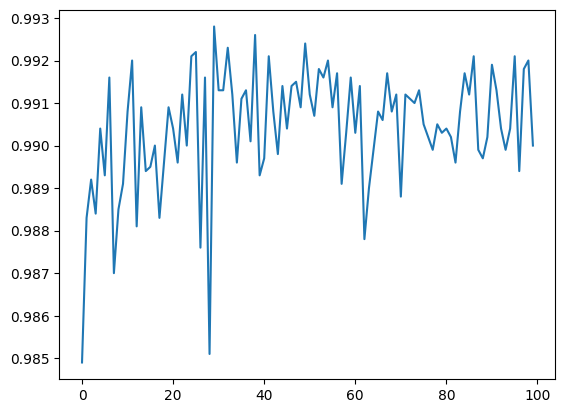

In [ ]:
plt.plot(acc_values);

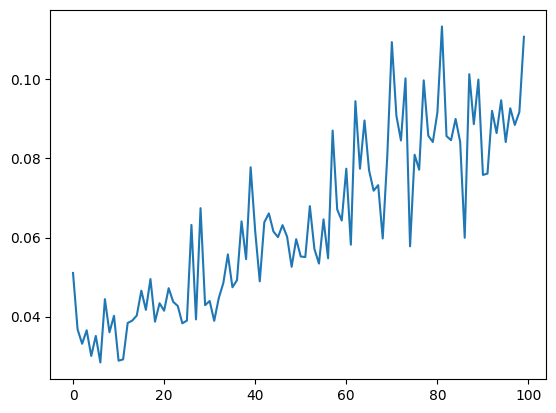

In [ ]:
plt.plot(loss_values);

In [ ]:
test_accuracy_df = pd.DataFrame(acc_values)
test_loss_df = pd.DataFrame(loss_values)

In [ ]:
test_accuracy_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_relu_accuracy.csv', index=False)
test_loss_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_relu_loss.csv', index=False)

### Предобработка для визуализации

In [ ]:
accuracy_LeNet5 = '/content/drive/MyDrive/ResNET/LeNet5_accuracy.csv'
loss_LeNet5 = '/content/drive/MyDrive/ResNET/LeNet5_loss.csv'

acc_mish = '/content/drive/MyDrive/ResNET/LeNet5_mish_accuracy.csv'
loss_mish = '/content/drive/MyDrive/ResNET/LeNet5_mish_loss.csv'

# test_acc_mish_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_300ep_mish_accuracy.csv', index=False)
# test_loss_mish_df.to_csv('/content/drive/MyDrive/ResNET/LeNet5_300ep_mish_loss.csv', index=False)

acc_mish_upgr = '/content/drive/MyDrive/ResNET/LeNet5_mish_upgr.csv'
loss_mish_upgr = '/content/drive/MyDrive/ResNET/LeNet5_loss_mish_upgr.csv'

acc_relu = '/content/drive/MyDrive/ResNET/LeNet5_relu_accuracy.csv'
loss_relu = '/content/drive/MyDrive/ResNET/LeNet5_relu_loss.csv'

In [ ]:
# LeNet5 исходная
acc_LeNet5 = pd.read_csv(accuracy_LeNet5)
acc_LeNet5 = acc_LeNet5[:100]
loss_LeNet5 = pd.read_csv(loss_LeNet5)
loss_LeNet5 = loss_LeNet5[:100]

# Mish
acc_mish_df = pd.read_csv(acc_mish)
loss_mish_df = pd.read_csv(loss_mish)

# Mish upgr
acc_mish_upgr_df = pd.read_csv(acc_mish_upgr)
loss_mish_upgr_df = pd.read_csv(loss_mish_upgr)

# Mish upgr
acc_relu_df = pd.read_csv(acc_relu)
loss_relu_df = pd.read_csv(loss_relu)

In [ ]:
acc_combined = pd.DataFrame({
    'LeNet5': acc_LeNet5.iloc[:,0],
    'Mish': acc_mish_df.iloc[:,0],
    'Mish Upgr': acc_mish_upgr_df.iloc[:,0],
    'ReLU': acc_relu_df.iloc[:,0]
})
acc_combined.head()

,LeNet5,Mish,Mish Upgr,ReLU
0,0.9736,0.9820,0.9837,0.9849
1,0.9828,0.9823,0.9858,0.9883
2,0.9859,0.9857,0.9884,0.9892
3,0.9875,0.9859,0.9906,0.9884
4,0.9889,0.9861,0.9898,0.9904


In [ ]:
loss_combined = pd.DataFrame({
    'LeNet5': loss_LeNet5.iloc[:,0],
    'Mish': loss_mish_df.iloc[:,0],
    'Mish Upgr': loss_mish_upgr_df.iloc[:,0],
    'ReLU': loss_relu_df.iloc[:,0]
})
loss_combined.head()

,LeNet5,Mish,Mish Upgr,ReLU
0,0.086170,0.055615,0.050459,0.051043
1,0.054369,0.056612,0.043106,0.036793
2,0.044117,0.044676,0.034023,0.033137
3,0.038778,0.041568,0.033728,0.036550
4,0.037117,0.044251,0.032191,0.030054


In [ ]:
import seaborn as sns
# Установка стиля для графиков
sns.set(style="whitegrid")

### Визуализация

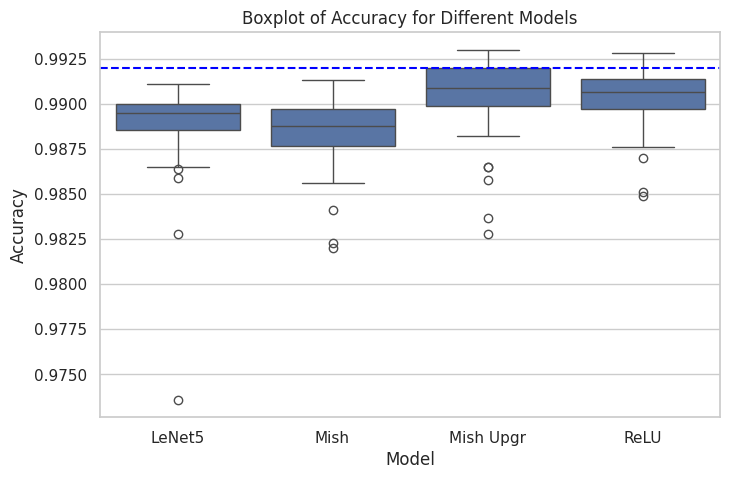

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Model', y='Accuracy', data=acc_combined.melt(var_name='Model', value_name='Accuracy'))
plt.title('Boxplot of Accuracy for Different Models')
plt.axhline(y=0.9920, color='blue', linestyle='--', linewidth=1.5, label='Target: 0.9920')
plt.show()

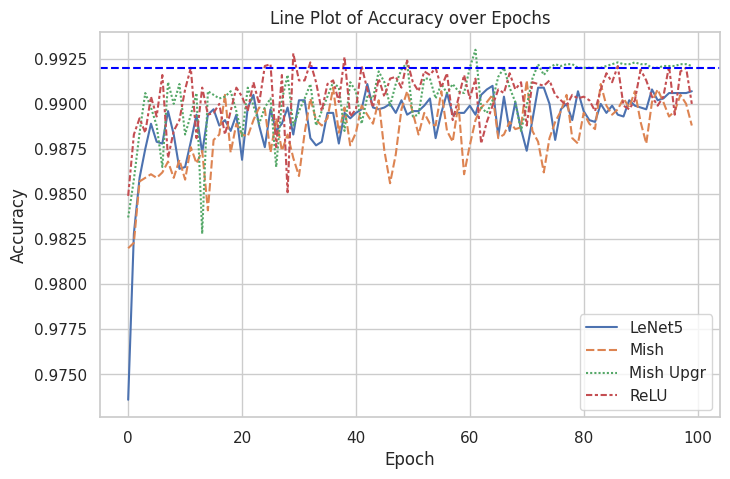

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=acc_combined)
plt.title('Line Plot of Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.axhline(y=0.9920, color='blue', linestyle='--', linewidth=1.5, label='Target: 0.9920')
plt.show()

100 epoch, 100 batchsize

LeNet5 - исходная модель с функцией активации Tahn и AvgPooling-ом

Mish - заменена функция активации на Mish и внедрен MaxPooling

Mish Upgr - Mish, MaxPooling, Доп. свёрточные слои, доп. полносвязные слои, меньший padding

ReLU - заменил функцию активации на ReLU

На графике наблюдается, что из всех моделей, лучше всего Mish Upgr достигает уровня точности в 0.992. После 70 эпохи модель колеблется возле этого результата - может быть признаком оверфиттинга.

BoxPlot более информативен с позиции оценки метрики точности. По сравнению с другими моделями Mish Upgr больше других приближается к целевой метрике. Интересно, что обычная функция активации Mish ухудшает результат, в сравнении с исходной моделью. ReLU хорошо улучшает изначальный результат, среднее близко к Mish Upgr.

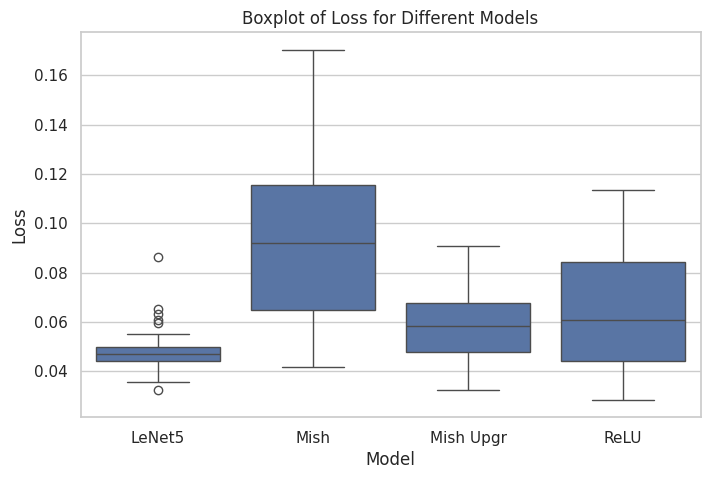

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Model', y='Loss', data=loss_combined.melt(var_name='Model', value_name='Loss'))
plt.title('Boxplot of Loss for Different Models')
plt.show()

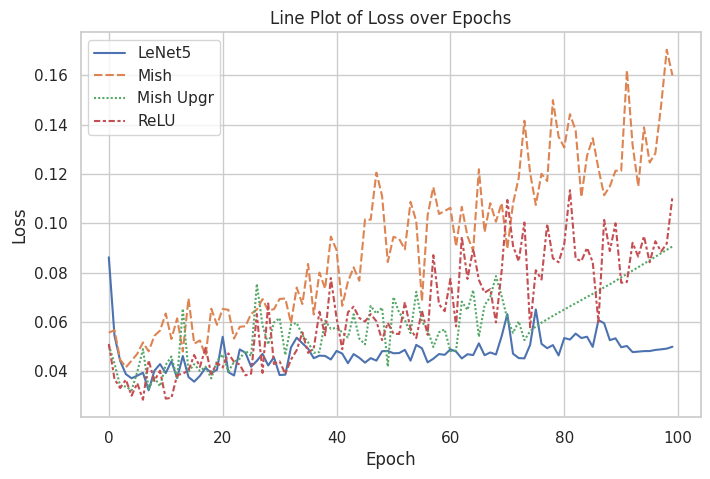

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=loss_combined)
plt.title('Line Plot of Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

LeNet5 показывает самую стабильную метрику из всех по вариативности в BoxPlot. Относительно низкий уровень у Mish Upgr, среднее данной модели сопоставимо с ReLU, но вариативность у второй гораздо больше.
Такой график потерь, как у Mish Upgr, после 70 эпохи, может говорить о переобучении модели. Исходная модель тут показывает лучший результат.

Как резюме, стоит рассмотреть для работы Mish Upgr, но нужно решить вопрос переобучения. По метрикам она значительно выигрывает у всех других, при учёте лосса.